In [4]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [5]:
trainset = pd.read_csv('train.csv')

# Visualization

## Per Item

In [2]:
item = 1

In [6]:
trainset_per_item = trainset[trainset['item']==item].drop('item', axis=1)
trainset_per_item['date'] = pd.to_datetime(trainset_per_item['date'])

In [7]:
trainset_per_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18260 entries, 0 to 18259
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18260 non-null  datetime64[ns]
 1   store   18260 non-null  int64         
 2   sales   18260 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 570.6 KB


### 3D Plot

Show the plot against stores, sales and dates

In [ ]:
# turn it on only when displaying the 3d
# %matplotlib qt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = trainset_per_item['date'].astype(np.int64)
z = trainset_per_item['sales']
y = trainset_per_item['store']

ax.scatter(x, y, z, c=trainset_per_item['store'])
plt.show()

### 2D Plot

use different color for different stores to collapse the dimension

In [14]:
trainset_per_item['date'].astype(np.int64)

0        1356998400000000000
1        1357084800000000000
2        1357171200000000000
3        1357257600000000000
4        1357344000000000000
                ...         
18255    1514332800000000000
18256    1514419200000000000
18257    1514505600000000000
18258    1514592000000000000
18259    1514678400000000000
Name: date, Length: 18260, dtype: int64

In [13]:
trainset_per_item[trainset_per_item['store'] == 1]['sales']

0       13
1       11
2       14
3       13
4       10
        ..
1821    14
1822    19
1823    15
1824    27
1825    23
Name: sales, Length: 1826, dtype: int64

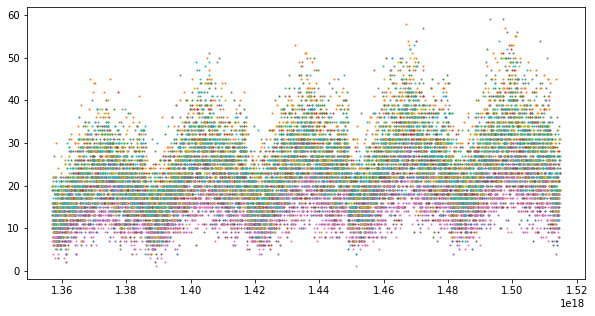

In [23]:
# TODO: unreadable.. should find out ways to visualize groups of data
fig = plt.figure(figsize=(10,5))
for s in trainset_per_item['store'].unique():
    df_per_store = trainset_per_item[trainset_per_item['store'] == s]
    plt.scatter(df_per_store['date'].astype(np.int64), df_per_store['sales'], s=1)
plt.show()

### Group Analysis

In [7]:
df_groups = trainset_per_item.groupby(['store'])
display(df_groups.describe())

groups = [df_groups.get_group(1)['sales'], df_groups.get_group(2)['sales'],
df_groups.get_group(3)['sales'], df_groups.get_group(4)['sales'],
df_groups.get_group(5)['sales'], df_groups.get_group(6)['sales'],
df_groups.get_group(7)['sales'], df_groups.get_group(8)['sales'],
df_groups.get_group(9)['sales'], df_groups.get_group(10)['sales']]

sales                                                  
        count       mean       std  min   25%   50%   75%   max
store                                                          
1      1826.0  19.971522  6.741022  4.0  15.0  19.0  24.0  50.0
2      1826.0  28.173604  8.681013  6.0  22.0  28.0  34.0  58.0
3      1826.0  25.070099  7.897391  4.0  19.0  24.5  30.0  52.0
4      1826.0  22.938664  7.348810  4.0  18.0  22.0  28.0  54.0
5      1826.0  16.739321  5.772961  3.0  13.0  16.0  20.0  40.0
6      1826.0  16.717963  5.626929  2.0  13.0  17.0  21.0  37.0
7      1826.0  15.159365  5.374349  1.0  11.0  15.0  19.0  40.0
8      1826.0  26.983571  8.676326  7.0  21.0  26.0  32.0  59.0
9      1826.0  23.325849  7.687710  4.0  18.0  23.0  28.0  51.0
10     1826.0  24.736035  7.941594  4.0  19.0  24.0  30.0  54.0

Box Whisker Plot

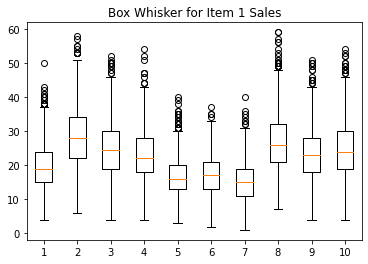

In [8]:
fig = plt.figure()
plt.boxplot(groups)
plt.title('Box Whisker for Item %d Sales'%item)
plt.show()


Mean Plot

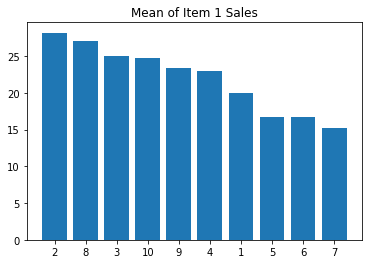

In [9]:
df_sorted_by_sales = df_groups.mean().sort_values('sales', ascending=False)

fig = plt.figure()
plt.bar(df_sorted_by_sales.index.astype('str'), df_sorted_by_sales['sales'])
plt.title('Mean of Item %d Sales'%item)
plt.show()

Var Analysis

In [19]:
df_groups.std().sort_values('sales', ascending=False)

,sales
store,
2,8.681013
8,8.676326
10,7.941594
3,7.897391
9,7.687710
4,7.348810
1,6.741022
5,5.772961
6,5.626929


## Per Store

In [3]:
store = 1

In [4]:
df_per_store = trainset[trainset['store']==1].drop(['store'], axis=1)
df_per_store['date'] = pd.to_datetime(df_per_store['date'])
df_per_store.describe()

,item,sales
count,91300.000000,91300.000000
mean,25.500000,47.268379
std,14.430949,24.006252
min,1.000000,1.000000
25%,13.000000,28.000000
50%,25.500000,44.000000
75%,38.000000,63.000000
max,50.000000,155.000000


### Sales Visualization

### Group Analysis

In [5]:
item_groups = df_per_store.groupby(by='item')
item_groups.head()

,date,item,sales
0,2013-01-01,1,13
1,2013-01-02,1,11
2,2013-01-03,1,14
3,2013-01-04,1,13
4,2013-01-05,1,10
...,...,...,...
894740,2013-01-01,50,30
894741,2013-01-02,50,32
894742,2013-01-03,50,25
894743,2013-01-04,50,32


In [6]:
item_groups.describe()

sales                                                       
       count       mean        std   min    25%   50%    75%    max
item                                                               
1     1826.0  19.971522   6.741022   4.0  15.00  19.0  24.00   50.0
2     1826.0  53.148959  15.005779  13.0  43.00  52.0  63.00  115.0
3     1826.0  33.208105  10.072529   8.0  26.00  33.0  40.00   70.0
4     1826.0  19.956188   6.640618   4.0  15.00  20.0  24.00   43.0
5     1826.0  16.612815   5.672102   3.0  13.00  16.0  20.00   37.0
6     1826.0  53.060789  14.826416  17.0  42.00  52.0  63.00  104.0
7     1826.0  52.783680  15.073838  14.0  42.00  52.0  63.00  115.0
8     1826.0  69.472070  18.751980  24.0  56.00  68.5  83.00  137.0
9     1826.0  46.504929  13.247496  14.0  37.00  46.0  55.00   94.0
10    1826.0  66.354326  18.283007  16.0  53.00  65.0  79.00  131.0
11    1826.0  63.217963  17.230417  11.0  51.00  62.0  75.00  124.0
12    1826.0  63.233844  17.636872  21.0  50.00  62.0  74.00  133.0
13    1826.0  76.159365  20.374852  27.0  61.00  75.0  91.00  139.0
14    1826.0  53.148959  14.769971  20.0  42.00  52.0  63.00  107.0
15    1826.0  79.680723  21.725799  17.0  64.00  78.0  94.00  154.0
16    1826.0  23.332421   7.614738   5.0  18.00  23.0  29.00   55.0
17    1826.0  29.972070   9.116824   9.0  23.00  29.0  36.00   61.0
18    1826.0  76.345564  21.053109  28.0  61.00  75.0  90.00  155.0
19    1826.0  36.676889  11.100620  11.0  29.00  36.0  44.00   75.0
20    1826.0  42.890471  12.181551  11.0  34.00  42.0  51.00   87.0
21    1826.0  36.176342  10.840796   9.0  28.00  35.0  43.00   74.0
22    1826.0  72.781490  19.808007  25.0  58.00  72.0  86.00  143.0
23    1826.0  26.469880   8.460734   5.0  20.00  26.0  32.00   55.0
24    1826.0  60.000000  16.642840  18.0  48.00  59.0  71.00  121.0
25    1826.0  72.736035  19.799388  24.0  57.00  72.0  86.00  143.0
26    1826.0  43.236035  12.848906  12.0  34.00  43.0  52.00   96.0
27    1826.0  20.050931   6.640278   1.0  15.00  20.0  24.75   48.0
28    1826.0  79.566813  21.460002  32.0  63.00  79.0  94.00  155.0
29    1826.0  63.086528  17.277086  19.0  50.00  62.0  75.00  124.0
30    1826.0  36.318182  10.938036  13.0  28.00  36.0  43.75   72.0
31    1826.0  53.008215  14.954009  15.0  42.00  52.0  63.00  106.0
32    1826.0  39.837897  11.464108  13.0  32.00  39.0  47.00   81.0
33    1826.0  62.755750  17.178149  23.0  50.00  62.0  74.00  123.0
34    1826.0  23.274918   7.499406   5.0  18.00  23.0  28.00   48.0
35    1826.0  59.495071  16.482759  20.0  47.00  58.0  70.00  115.0
36    1826.0  69.309967  19.170648  24.0  55.00  68.0  83.00  151.0
37    1826.0  26.424425   8.312726   8.0  20.00  26.0  32.00   62.0
38    1826.0  73.344469  19.948156  19.0  58.25  72.0  87.00  150.0
39    1826.0  39.694962  11.783459  13.0  31.00  39.0  47.00   86.0
40    1826.0  26.443593   8.208805   7.0  20.00  26.0  32.00   57.0
41    1826.0  20.002738   6.684883   3.0  15.00  20.0  25.00   42.0
42    1826.0  33.105696   9.623903   7.0  26.00  33.0  39.00   71.0
43    1826.0  46.242607  13.345104  15.0  37.00  45.0  55.00   98.0
44    1826.0  26.594195   8.364186   7.0  21.00  26.0  32.00   58.0
45    1826.0  72.720701  19.730340  25.0  58.00  72.0  86.00  135.0
46    1826.0  52.845016  14.932417  15.0  42.00  52.0  63.00  109.0
47    1826.0  19.814348   6.554391   4.0  15.00  19.0  24.00   44.0
48    1826.0  46.546002  13.416421  13.0  36.25  45.0  56.00   94.0
49    1826.0  26.461665   8.299193   7.0  20.25  26.0  32.00   53.0
50    1826.0  59.342826  16.380065  19.0  47.00  59.0  70.00  111.0

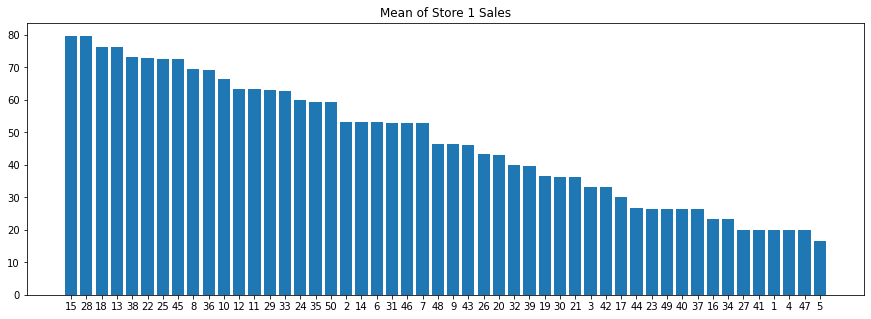

In [11]:
df_sorted_by_sales = item_groups.mean().sort_values(by='sales', ascending=False)

fig = plt.figure(figsize=(15,5))
plt.bar(df_sorted_by_sales.index.astype('str'), df_sorted_by_sales['sales'])
plt.title('Mean of Store %d Sales'%store)
plt.show()